<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>Binary Classification</b></h3></center>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn import preprocessing

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>Load the Dataset A</b></h3></center>

In [13]:
df = pd.read_csv("DataA1.csv")
print("Shape of the dataset", df.shape)
df.head()

Shape of the dataset (2200, 58)


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Label
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


<center>
    <h4 style="font-family:cursive; color:#ff6666;">
        1. Preprocess the data using the Z-score normalization, and randomly split the data into a training set and a test set using the hold-out scheme: 70% of samples for training and the other 30% for testing.
    </h4>
</center>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
len = df.shape[1]-1

#split the dataset into X and Y label
X_Data = df.drop(columns=['Label']).values
Y_Lavel = df['Label'].values.ravel()

# Fit and transform the data into Z-score
scaler = StandardScaler()
X_Data = scaler.fit_transform(X_Data)

# Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Lavel, test_size=0.3, random_state=42)
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Training set size:  (1540, 57)
Test set size:  (660, 57)


<center>
    <h4 style="font-family:cursive; color:#ff6666;">
        2. Use 5-fold cross validation on the training set to select the parameters k for k-NN from the set [1, 3, 5, 7, ..., 31]. Plot a figure that shows the relationship between the accuracy and the parameter k. Report the best k in terms of classification accuracy. 
    </h4>
</center>

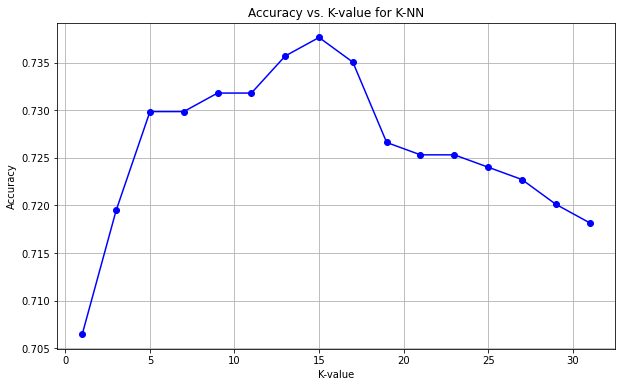

Accuracy: 0.706 for k = 1
Accuracy: 0.719 for k = 3
Accuracy: 0.730 for k = 5
Accuracy: 0.730 for k = 7
Accuracy: 0.732 for k = 9
Accuracy: 0.732 for k = 11
Accuracy: 0.736 for k = 13
Accuracy: 0.738 for k = 15
Accuracy: 0.735 for k = 17
Accuracy: 0.727 for k = 19
Accuracy: 0.725 for k = 21
Accuracy: 0.725 for k = 23
Accuracy: 0.724 for k = 25
Accuracy: 0.723 for k = 27
Accuracy: 0.720 for k = 29
Accuracy: 0.718 for k = 31
The best k in terms of classification accuracy is:  15
The highest classification accuracy achieved is: 0.738


In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Set the seed 
np.random.seed(42)

# Define the parameter range, k values from 1 to 31 with step size 2
k_values = list(range(1, 32, 2))

# Initialize a list to store cross-validation scores
cv_scores = []

# Perform 5-fold cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K-value for K-NN')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Print the cross-validation scores for each k value
for k, score in zip(k_values, cv_scores):
    print(f"Accuracy: {score:.3f} for k = {k}")

# Report the best k in terms of classification accuracy
best_k = k_values[cv_scores.index(max(cv_scores))]
print("The best k in terms of classification accuracy is: ", best_k)
print(f"The highest classification accuracy achieved is: {max(cv_scores):.3f}")

<center>
    <h4 style="font-family:cursive; color:#ff6666;">
 3. For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term c and the kernel width parameter gamma. Again use 5-fold cross validation on the training set to select the parameter c from the set [0.1, 0.5, 1, 2, 5, 10, 20, 50] and select the parameter gamma from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classification accuracy. 
    </h4>
</center>

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter sets to test
param_grid = {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50], 
              'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
              'kernel': ['rbf']}

# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5)

# Train the classifier on data1's feature and target data
clf.fit(X_train, Y_train) 

# Print each parameter setting and its performance
print("Grid scores on training set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("Accuracy: %0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# View the accuracy score
print('\nBest score for training data:', clf.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C,"\n") 
print('Best Gamma:',clf.best_estimator_.gamma,"\n")

Grid scores on training set:

Accuracy: 0.837 (+/-0.048) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 2, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 5, 'kernel': 'rbf'}
Accuracy: 0.529 (+/-0.003) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Accuracy: 0.859 (+/-0.032) for {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.786 (+/-0.028) for {'C': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}
Accuracy: 0.571 (+/-0.017) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.545 (+/-0.014) for {'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}
Accuracy: 0.542 (+/-0.012) for {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.542 (+/-0.013)

<center>
    <h4 style="font-family:cursive; color:#ff6666;">
4. Using the chosen parameters from the above parameter selection process for k-NN and SVM, and the default setups for Naïve Bayes classifier and Decision Tree, classify the test set. Repeat each classification method 20 times by varying the split of training-test set as in Step (1). Report the average and standard deviation of classification performance on the test set regarding accuracy, precision, recall, and F1-score. 
    </h4>
</center>

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ShuffleSplit

# Initialize the classifiers with the chosen parameters
knn = KNeighborsClassifier(n_neighbors=15)
svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=42)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)

classifiers = [knn, svm, nb, dt]
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}
results = {classifier: {metric: [] for metric in metrics} for classifier in classifiers}

# Initialize the ShuffleSplit object
rs = ShuffleSplit(n_splits=20, test_size=0.3, random_state=42)

# Repeat the classification 20 times
for train_index, test_index in rs.split(X_Data):
    X_train, X_test = X_Data[train_index], X_Data[test_index]
    Y_train, Y_test = Y_Lavel[train_index], Y_Lavel[test_index]

    for classifier in classifiers:
        # Train the classifier and make predictions on the test set
        classifier.fit(X_train, Y_train)
        Y_pred = classifier.predict(X_test)

        # Calculate the performance metrics
        for metric, function in metrics.items():
            score = function(Y_test, Y_pred)
            results[classifier][metric].append(score)

# Calculate the average and standard deviation of the performance metrics
for classifier, metrics in results.items():
    print(f'\n{classifier.__class__.__name__}:')
    for metric, scores in metrics.items():
        avg = np.mean(scores)
        std = np.std(scores)
        print(f'{metric.capitalize()}: {avg:.2f} ± {std:.2f}')


KNeighborsClassifier:
Accuracy: 0.75 ± 0.02
Precision: 0.95 ± 0.02
Recall: 0.54 ± 0.04
F1: 0.69 ± 0.03

SVC:
Accuracy: 0.90 ± 0.01
Precision: 0.92 ± 0.02
Recall: 0.89 ± 0.02
F1: 0.90 ± 0.01

GaussianNB:
Accuracy: 0.87 ± 0.01
Precision: 0.87 ± 0.02
Recall: 0.88 ± 0.02
F1: 0.87 ± 0.01

DecisionTreeClassifier:
Accuracy: 0.93 ± 0.01
Precision: 0.94 ± 0.01
Recall: 0.93 ± 0.02
F1: 0.93 ± 0.01


<center>
    <h4 style="font-family:cursive; color:#ff6666;">
5. Comment on the obtained results. 
    </h4>
</center>

Based on the results we’ve shared, here are some observations:

**KNeighborsClassifier (KNN):** This model has the lowest accuracy among the four models. Although it has a high precision, its recall is quite low. This suggests that while the model is good at predicting positive instances correctly (high precision), it struggles to identify all the positive instances (low recall). The F1 score, which is the harmonic mean of precision and recall, is also relatively low.

**Support Vector Classifier (SVC):** This model performs significantly better than the KNeighborsClassifier in terms of all metrics. It has high accuracy, precision, recall, and F1 score, indicating that it is good at both predicting positive instances correctly and identifying all the positive instances.

**Gaussian Naive Bayes (GaussianNB):** This model has slightly lower performance metrics than the SVC but performs better than the KNeighborsClassifier. It has balanced precision and recall, suggesting that it is equally good at predicting positive instances correctly and identifying all the positive instances.

**DecisionTreeClassifier (DT):** This model has the highest performance metrics among all the models. It has high accuracy, precision, recall, and F1 score, indicating that it is excellent at both predicting positive instances correctly and identifying all the positive instances.

In conclusion, based on these results, the DecisionTreeClassifier seems to be the best model for your data. However, it’s important to note that these results might vary with different datasets or different splits of the data.